# Similarity Matching

In [1]:
%run setup.py

In [30]:
# Load data
df_Invited = pd.read_csv(os.path.join(filepath,'factInvited.csv'))
df_Invited['Source'] = "Invited"
df_Proceedings = pd.read_csv(os.path.join(filepath,'factProceedings.csv'))
df_Proceedings['Source'] = "Proceedings"
# Append data to one dataframe
df = df_Invited.append(df_Proceedings).reset_index(drop=True)
df = df[df['Productivity'] != 0]
df.head()

,Full name,Year,Conference (short),First name,Middle name,Last name,gender,Paper Count,Max Paper Count,First year paper,Age,Conference (long),Main Topic,Productivity,Source
0,Gary L. Baldwi,2004,ASPDAC,Gary,L.,Baldwi,M,4,4,1962,42,Asia and South Pacific Design Automation Confe...,Computer Architecture,0.095238,Invited
1,Rudy Lauwereins,2004,ASPDAC,Rudy,NaN,Lauwereins,M,112,196,1987,17,Asia and South Pacific Design Automation Confe...,Computer Architecture,6.588235,Invited
2,Rajeev Madhavan,2005,ASPDAC,Rajeev,NaN,Madhavan,M,5,5,1994,11,Asia and South Pacific Design Automation Confe...,Computer Architecture,0.454545,Invited
3,Jan M. Rabaey,2005,ASPDAC,Jan,M.,Rabaey,M,146,321,1985,20,Asia and South Pacific Design Automation Confe...,Computer Architecture,7.300000,Invited
4,Alberto Sangiovanni-Vincentelli,2006,ASPDAC,Alberto,NaN,Sangiovanni-Vincentelli,M,457,689,1973,33,Asia and South Pacific Design Automation Confe...,Computer Architecture,13.848485,Invited


# Method 1

In [3]:
'''
# Group the data by gender
grouped_data = df.groupby('gender')

# Calculate the cosine similarity between males and females
male_data = grouped_data.get_group('M')[['Paper Count', 'Age', 'Productivity']].reset_index()
female_data = grouped_data.get_group('F')[['Paper Count', 'Age', 'Productivity']].reset_index()
male_data_norm = (male_data - male_data.mean()) / male_data.std()
female_data_norm = (female_data - female_data.mean()) / female_data.std()
similarity_matrix = cosine_similarity(male_data_norm, female_data_norm)

df['Similar Females'] = ""

# List which males are similar to which females
for i, male in male_data.iterrows():
    similar_females = female_data.iloc[similarity_matrix[i].argsort()[::-1][:3]]
    similar_females_index = similar_females['index'].to_list() # get the index of similar females
    df.loc[male['index'], 'Similar Females'] = ", ".join(map(str, similar_females_index)) # assign to the new column
'''

In [31]:
# Group the data by gender
grouped_data = df.groupby('gender')

# Calculate the cosine similarity between males and females
male_data = grouped_data.get_group('M')[['Paper Count', 'Age', 'Productivity']].reset_index()
female_data = grouped_data.get_group('F')[['Paper Count', 'Age', 'Productivity']].reset_index()
male_data_norm = (male_data - male_data.mean()) / male_data.std()
female_data_norm = (female_data - female_data.mean()) / female_data.std()
similarity_matrix = cosine_similarity(male_data_norm, female_data_norm)

df['Similar Females'] = ""

# List which males are similar to which females
for i, male in male_data.iterrows():
    similarities = similarity_matrix[i] >= .9
    # print(similarities)
    similar_females = female_data.iloc[similarities]
    similar_females_index = similar_females['index'].to_list() # get the index of similar females
    df.loc[male['index'], 'Similar Females'] = ", ".join(map(str, similar_females_index)) # assign to the new column

df.head()

,Full name,Year,Conference (short),First name,Middle name,Last name,gender,Paper Count,Max Paper Count,First year paper,Age,Conference (long),Main Topic,Productivity,Source,Similar Females
0,Gary L. Baldwi,2004,ASPDAC,Gary,L.,Baldwi,M,4,4,1962,42,Asia and South Pacific Design Automation Confe...,Computer Architecture,0.095238,Invited,"57, 66, 81, 83, 96, 98, 107, 111, 112, 117, 11..."
1,Rudy Lauwereins,2004,ASPDAC,Rudy,NaN,Lauwereins,M,112,196,1987,17,Asia and South Pacific Design Automation Confe...,Computer Architecture,6.588235,Invited,"100, 156, 160, 174, 188, 199, 208, 217, 237, 2..."
2,Rajeev Madhavan,2005,ASPDAC,Rajeev,NaN,Madhavan,M,5,5,1994,11,Asia and South Pacific Design Automation Confe...,Computer Architecture,0.454545,Invited,"33, 58, 64, 67, 73, 89, 124, 134, 141, 145, 16..."
3,Jan M. Rabaey,2005,ASPDAC,Jan,M.,Rabaey,M,146,321,1985,20,Asia and South Pacific Design Automation Confe...,Computer Architecture,7.300000,Invited,"77, 100, 156, 174, 199, 208, 221, 249, 361, 38..."
4,Alberto Sangiovanni-Vincentelli,2006,ASPDAC,Alberto,NaN,Sangiovanni-Vincentelli,M,457,689,1973,33,Asia and South Pacific Design Automation Confe...,Computer Architecture,13.848485,Invited,"159, 206, 245, 256, 434, 497, 519, 542, 562, 5..."


In [32]:
df1 = df.copy()

In [34]:
df = df1.copy()

In [19]:
df.head()

,Full name,Year,Conference (short),First name,Middle name,Last name,gender,Paper Count,Max Paper Count,First year paper,Age,Conference (long),Main Topic,Productivity,Source,Similar Females
0,Gary L. Baldwi,2004,ASPDAC,Gary,L.,Baldwi,M,4,4,1962,42,Asia and South Pacific Design Automation Confe...,Computer Architecture,0.095238,Invited,"[Chieko Asakawa, Elizabeth Rosenzweig, Judith ..."
1,Rudy Lauwereins,2004,ASPDAC,Rudy,NaN,Lauwereins,M,112,196,1987,17,Asia and South Pacific Design Automation Confe...,Computer Architecture,6.588235,Invited,"[Elizabeth F. Churchill, Katherine J. Kuchenbe..."
2,Rajeev Madhavan,2005,ASPDAC,Rajeev,NaN,Madhavan,M,5,5,1994,11,Asia and South Pacific Design Automation Confe...,Computer Architecture,0.454545,Invited,"[Noriko Arai, Kishonna Gray, Daria Loi, Payal ..."
3,Jan M. Rabaey,2005,ASPDAC,Jan,M.,Rabaey,M,146,321,1985,20,Asia and South Pacific Design Automation Confe...,Computer Architecture,7.300000,Invited,"[Elizabeth Churchill, Elizabeth F. Churchill, ..."
4,Alberto Sangiovanni-Vincentelli,2006,ASPDAC,Alberto,NaN,Sangiovanni-Vincentelli,M,457,689,1973,33,Asia and South Pacific Design Automation Confe...,Computer Architecture,13.848485,Invited,"[Rama Chellappa, Cordelia Schmid, Cordelia Sch..."


In [37]:
# # step 1: replace index with names in 'Similar Females' column
# name_map = dict(zip(df.index, df['Full name']))
# df['Similar Females'] = df['Similar Females'].apply(lambda x: [name_map[int(i)] for i in x.split(',') if i])

# step 2: create a list of tuples containing all possible combinations of males and females who are similar
links = [(node,name) for node in list(df['Full name'].values) for name in df[df['Full name'] == node]['Similar Females'].values[0]]

# step 3: remove duplicates
links = list(dict.fromkeys(links))

In [36]:
df = df[df['Source'] == "Invited"]

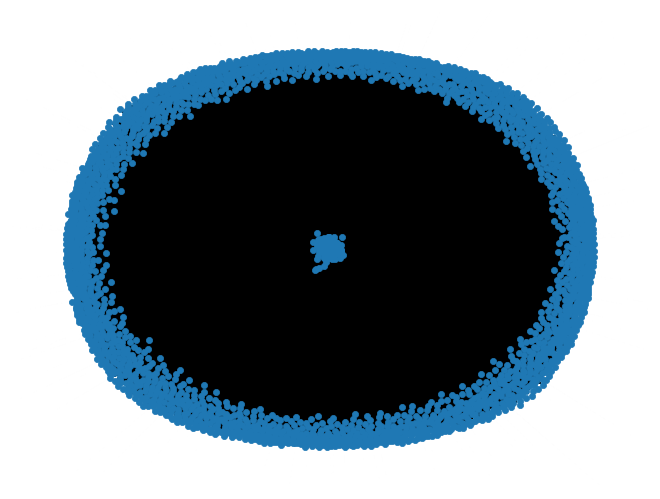

In [38]:
import networkx as nx
#Use a NetworkX DiGraph (directed graph)
G = nx.DiGraph()
G.add_nodes_from(df['Full name'])
G.add_edges_from(links)

nx.draw(G, with_labels = False, node_size=20)